<a href="https://colab.research.google.com/github/TirilaPatricGabriel/ML/blob/main/UpperConfidenceBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [23]:
import math
N = 10000
d = 10
ads_selected = []
number_picked = [0] * d
number_rewards = [0] * d
total_reward = 0

for round_id in range(0, N):

  max_upper_bound = 0
  selected_ad = 0
  average_reward = 0

  for ad_id in range(0, d):
    if number_picked[ad_id] == 0:
      upper_bound = float('inf')
    else:
      average_reward = number_rewards[ad_id] / number_picked[ad_id]
      delta_i = math.sqrt(3/2 * math.log(round_id+1) / number_picked[ad_id])
      upper_bound = average_reward + delta_i
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      selected_ad = ad_id
  ads_selected.append(selected_ad)
  number_picked[selected_ad] = number_picked[selected_ad] + 1
  reward = dataset.values[round_id, selected_ad]
  number_rewards[selected_ad] = number_rewards[selected_ad] + reward
  total_reward = total_reward + reward

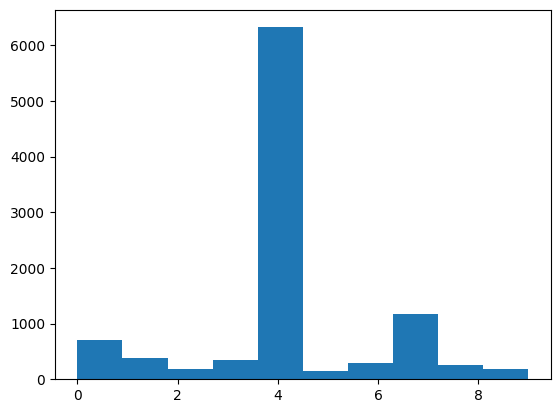

In [22]:
plt.hist(ads_selected)

(array([60., 51., 35., 35., 79., 31., 51., 81., 42., 35.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

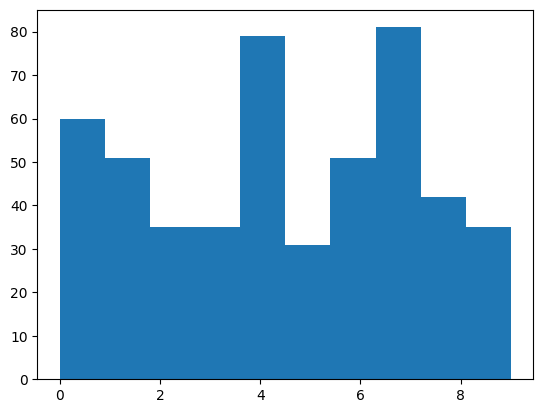

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

import math
n_rounds = 500
n_ads = 10
n_selected = [0] * n_ads
sum_rewards = [0] * n_ads
ads_selected = []
total_reward = 0

for rnd in range(0, n_rounds):

  selected_ad = 0
  max_upper_bound = 0

  for ad in range(0, n_ads):
    if n_selected[ad] == 0:
      upper_bound = float('inf')
    else:
      avg_reward = sum_rewards[ad] / n_selected[ad]
      delta_i = math.sqrt(3/2 * math.log(rnd+1) / n_selected[ad])
      upper_bound = avg_reward + delta_i
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      selected_ad = ad

  reward_of_ad = dataset.values[rnd, selected_ad]
  n_selected[selected_ad] = n_selected[selected_ad] + 1
  sum_rewards[selected_ad] += reward_of_ad
  ads_selected.append(selected_ad)
  total_reward += reward_of_ad

plt.hist(ads_selected)